In [1]:
# In this project I have set out to build a supervised machine learning model on a dataset
# consisting of crabs, their age, and several physical attributes. The goal is to 
# based on the physical attributes build a model that can predict the age of a crab

# The dataset used can be found at the following link: 
# https://www.kaggle.com/datasets/sidhus/crab-age-prediction

In [2]:
import pandas as pd
df = pd.read_csv("CrabAgePrediction.csv")

In [3]:
df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split

In [6]:
# Performing some initial exploratory data analysis, to see if certain features
# seem to have a relationship with age

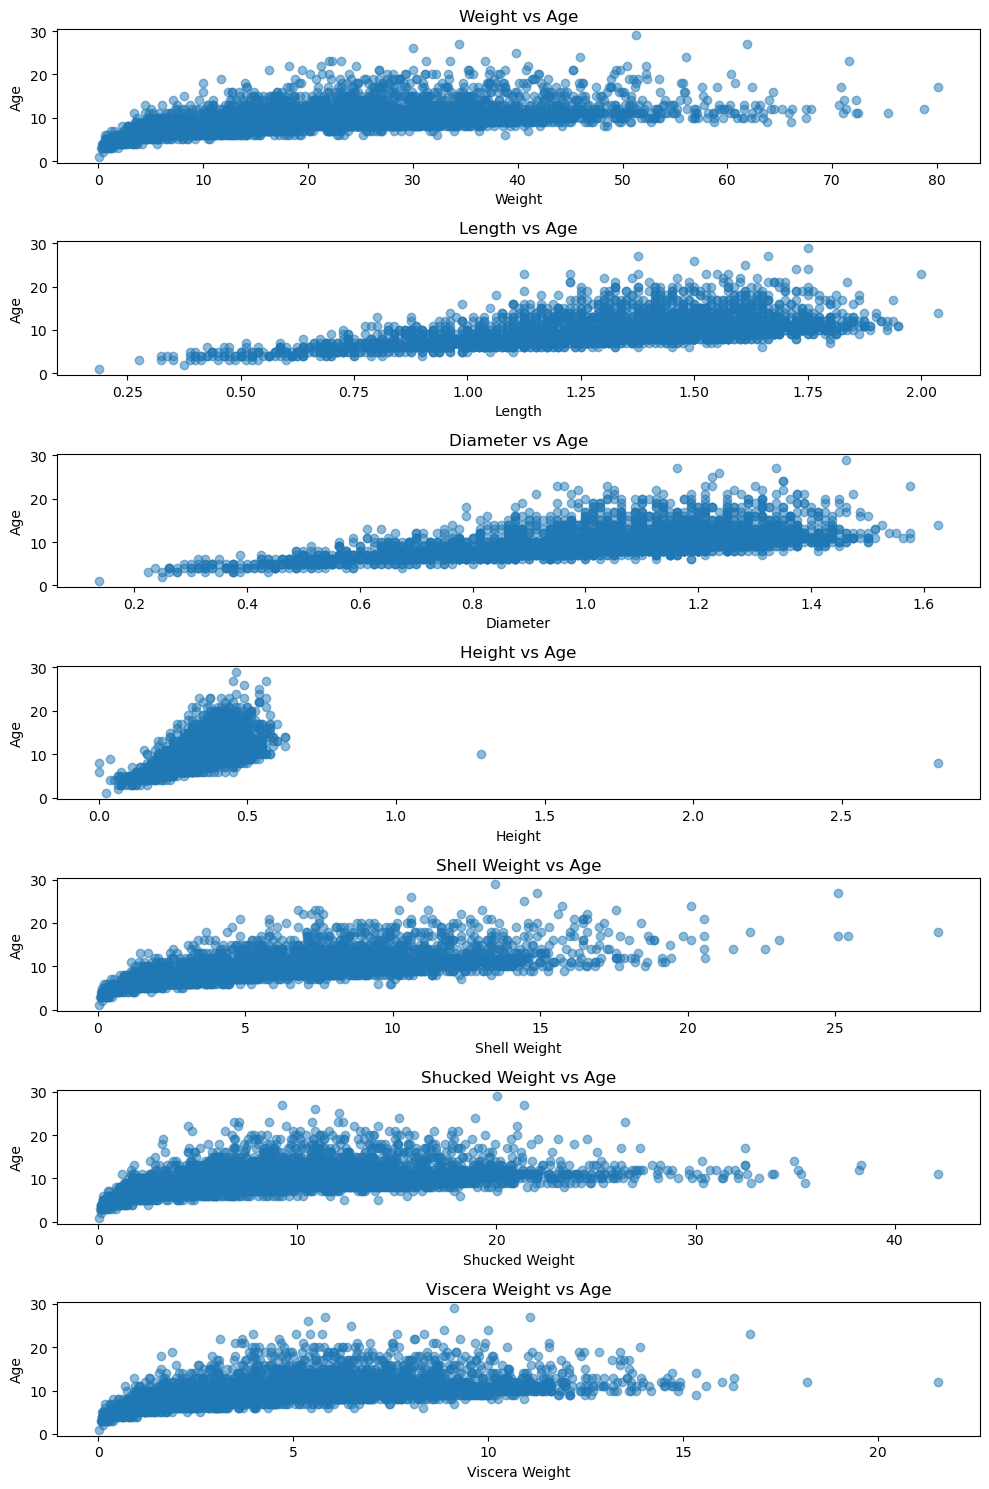

In [7]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
fig, axs = plt.subplots(7, 1, figsize=(10, 15))  # Create a figure with 3 sub-plots arranged in 1 column

# Scatter plot for Weight vs Age
axs[0].scatter(df['Weight'], df['Age'], alpha=0.5)
axs[0].set_xlabel('Weight')
axs[0].set_ylabel('Age')
axs[0].set_title('Weight vs Age')

# Scatter plot for Length vs Age
axs[1].scatter(df['Length'], df['Age'], alpha=0.5)
axs[1].set_xlabel('Length')
axs[1].set_ylabel('Age')
axs[1].set_title('Length vs Age')

# Scatter plot for Diameter vs Age
axs[2].scatter(df['Diameter'], df['Age'], alpha=0.5)
axs[2].set_xlabel('Diameter')
axs[2].set_ylabel('Age')
axs[2].set_title('Diameter vs Age')

axs[3].scatter(df['Height'], df['Age'], alpha=0.5)
axs[3].set_xlabel('Height')
axs[3].set_ylabel('Age')
axs[3].set_title('Height vs Age')

axs[4].scatter(df['Shell Weight'], df['Age'], alpha=0.5)
axs[4].set_xlabel('Shell Weight')
axs[4].set_ylabel('Age')
axs[4].set_title('Shell Weight vs Age')

axs[5].scatter(df['Shucked Weight'], df['Age'], alpha=0.5)
axs[5].set_xlabel('Shucked Weight')
axs[5].set_ylabel('Age')
axs[5].set_title('Shucked Weight vs Age')

axs[6].scatter(df['Viscera Weight'], df['Age'], alpha=0.5)
axs[6].set_xlabel('Viscera Weight')
axs[6].set_ylabel('Age')
axs[6].set_title('Viscera Weight vs Age')

plt.tight_layout()  # Adjusts the space between the plots
plt.show()

In [8]:
# There seems to be some relationship, although weak, between physical attributes
# and age

# Removing outliers with IQR

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
filtered = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

df = filtered

/var/folders/qx/b5gv5rk134n7fsjg968xynj40000gn/T/ipykernel_85575/1524335305.py:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
/var/folders/qx/b5gv5rk134n7fsjg968xynj40000gn/T/ipykernel_85575/1524335305.py:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
/var/folders/qx/b5gv5rk134n7fsjg968xynj40000gn/T/ipykernel_85575/1524335305.py:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  filtered = df[~((df < (Q1 - 1.5 * IQR)) |(d

In [9]:
import numpy as np

# Testing out some feature engineering (ended up using none of the created features)

df['BMI'] = df['Weight'] / (df['Length']**2)
df['Volume'] = df['Length'] * df['Diameter'] * df['Height']
df['Area'] = np.pi * (df['Diameter'] / 2)**2

In [10]:
# Creating X and y, target variable Age

X = df.drop(columns = ["Age"])
y = df["Age"]

# Performing the X/y split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [11]:
# Preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_transformer

# I ended up not using the created BMI and Volume columns
num_features = ['Length', 'Height', 'Viscera Weight', 'Weight',
                "Shell Weight", "Shucked Weight", "Diameter"]
cat_features = ["Sex"]



scaler = StandardScaler()
num_transformer = make_pipeline(scaler)

encoder = OneHotEncoder(drop = "if_binary", sparse_output=False)
cat_transformer = encoder

preprocessor = make_column_transformer((num_transformer, num_features),
                                      (cat_transformer, cat_features))

In [12]:
# Testing out different models with standard parameters

regressors = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    SVR(),
    KNeighborsRegressor(),
    
]

for reg in regressors:
    pipe = make_pipeline(preprocessor, reg)
    grid = GridSearchCV(estimator = pipe, param_grid = {}, cv = 5, scoring = "r2")
    grid.fit(X_train, y_train)
    
    print(f"Train score for {reg}: {grid.best_score_}")
    print("")

Train score for LinearRegression(): 0.49919938226154137

Train score for DecisionTreeRegressor(): 0.09124425902917081

Train score for RandomForestRegressor(): 0.5208406615053608

Train score for SVR(): 0.5402168931177199

Train score for KNeighborsRegressor(): 0.4667805194033575



In [13]:
# SVR and RandomForestRegressor got the best scores, testing them both with
# hyperparameter tuning

In [14]:
# SVR

param_grid_svr = {
    'svr__C': [0.1, 1, 10, 100, 1000],   # higher C will make model more "strict" (risk for overfitting)
    'svr__gamma': [1, 0.1, 0.01, 0.001, 0.0001] # higher gamma will be more "strict"
    } 

regressor = SVR()
pipe = make_pipeline(preprocessor, regressor)

grid_svr = GridSearchCV(
    estimator=pipe
    ,param_grid=param_grid_svr
    ,cv=10
    ,scoring="r2",
    n_jobs = -1
    )

grid_svr.fit(X_train, y_train)

print("Best score: ", grid_svr.best_score_)
print("Best params: ", grid_svr.best_params_)

Best score:  0.5467138505790332
Best params:  {'svr__C': 10, 'svr__gamma': 0.1}


In [15]:
model_svr = grid_svr.best_estimator_
model_svr.fit(X_train, y_train)
model_svr.score(X_train, y_train)

0.5821080184172268

In [16]:
# RandomForestRegressor

param_grid_rf = {
    "randomforestregressor__min_samples_leaf": [3, 6, 10],
    "randomforestregressor__max_depth": [3, 5, 10],
    "randomforestregressor__n_estimators": [100, 200, 300]
}

classifier = RandomForestRegressor()
pipe = make_pipeline(preprocessor, classifier)

grid_rf = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid_rf,
    cv = 10,
    scoring = "r2",
    n_jobs=-1)

grid_rf.fit(X_train, y_train)

print("Best score: ", grid_rf.best_score_)
print("Best params: ", grid_rf.best_params_)

Best score:  0.5382872209185453
Best params:  {'randomforestregressor__max_depth': 10, 'randomforestregressor__min_samples_leaf': 10, 'randomforestregressor__n_estimators': 200}


In [17]:
model_rf = grid_rf.best_estimator_
model_rf.fit(X_train, y_train)
model_rf.score(X_train, y_train)

0.6872194327744052

In [18]:
# Decided to go with RandomForestRegressor.

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model_rf.predict(X_train)

# Testing MSE and r2 on training data
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 1.6943431641989504
R^2 Score: 0.6872194327744052


In [20]:
# Creating a dummy regressor with strategy "mean"
# This will be the baseline for my model to beat

from sklearn.dummy import DummyRegressor

# Create a dummy regressor
dummy_regr = DummyRegressor(strategy="mean")

# Fit the dummy regressor to the training data
dummy_regr.fit(X_train, y_train)

# Get predictions on the testing data
y_pred = dummy_regr.predict(X_test)

# Evaluate the baseline model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 5.570819614237666
R^2 Score: -0.0003271453162225768


In [21]:
# Testing my model on the test data
y_pred = model_rf.predict(X_test)

# Evaluating on test data
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 2.679591807715545
R^2 Score: 0.5188376918947081


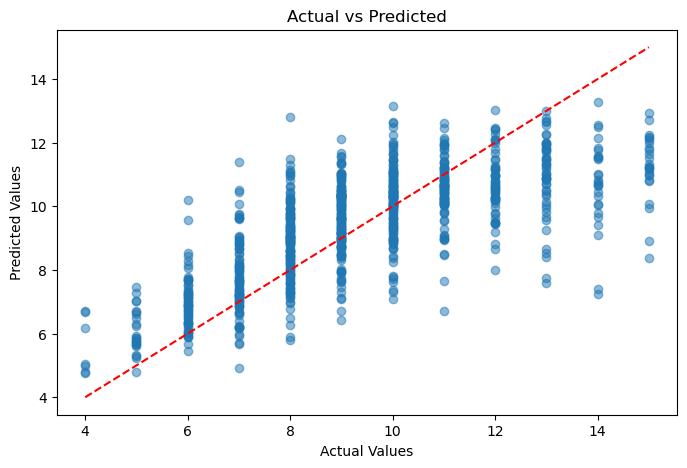

In [22]:
# Visualizing how my model performs. The closer the dots are to the red line, the better.
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line of perfect fit
plt.show()